In [1]:
# Load data
import pandas as pd

df = pd.read_sql_table("game_stats", "sqlite:///backend/database/game_stats.db")
df.head()


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42024,1610612760,OKC,Oklahoma City Thunder,0042400407,2025-06-22,OKC vs. IND,W,240,103,...,0.710,13,27,40,20,14,8,7,23,12.0
1,42024,1610612754,IND,Indiana Pacers,0042400407,2025-06-22,IND @ OKC,L,240,91,...,0.759,12,33,45,17,6,4,21,24,-12.0
2,42024,1610612760,OKC,Oklahoma City Thunder,0042400406,2025-06-19,OKC @ IND,L,240,91,...,0.808,4,37,41,14,4,4,21,20,-17.0
3,42024,1610612754,IND,Indiana Pacers,0042400406,2025-06-19,IND vs. OKC,W,240,108,...,0.680,11,35,46,23,16,5,10,17,17.0
4,42024,1610612760,OKC,Oklahoma City Thunder,0042400405,2025-06-16,OKC vs. IND,W,239,120,...,0.813,19,26,45,24,15,12,11,24,11.0


In [2]:
# drop columns and replace categorical data
df.drop(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'MIN'], axis=1, inplace=True)
df.replace({'L':0, 'W':1}, inplace=True)
df.head()


C:\Users\keira\AppData\Local\Temp\ipykernel_13296\3343789596.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'L':0, 'W':1}, inplace=True)


,WL,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,1,103,35,87,0.402,11,40,0.275,22,31,0.710,13,27,40,20,14,8,7,23,12.0
1,0,91,29,70,0.414,11,28,0.393,22,29,0.759,12,33,45,17,6,4,21,24,-12.0
2,0,91,31,74,0.419,8,30,0.267,21,26,0.808,4,37,41,14,4,4,21,20,-17.0
3,1,108,38,92,0.413,15,42,0.357,17,25,0.680,11,35,46,23,16,5,10,17,17.0
4,1,120,40,94,0.426,14,32,0.438,26,32,0.813,19,26,45,24,15,12,11,24,11.0


In [3]:
X = df.drop('WL', axis=1)
y = df['WL']

In [4]:
# Split and scale Features
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

test_size_ratio = .15
eval_size_ratio = .15 / (1-test_size_ratio)

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size_ratio)
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=eval_size_ratio)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
X_eval = pd.DataFrame(scaler.transform(X_eval), columns=X.columns)

In [5]:
#import numpy as np
#X_train = np.where(np.isnan(X_train), 0, X_train)
#X_test = np.where(np.isnan(X_test), 0, X_test)
#X_eval = np.where(np.isnan(X_eval), 0, X_eval)
X_train.fillna(0,inplace=True)
X_test.fillna(0,inplace=True)
X_eval.fillna(0,inplace=True)
X_train[X_train.isna().any(axis=1)]

,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS


In [6]:
# PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_eval = pca.transform(X_eval)

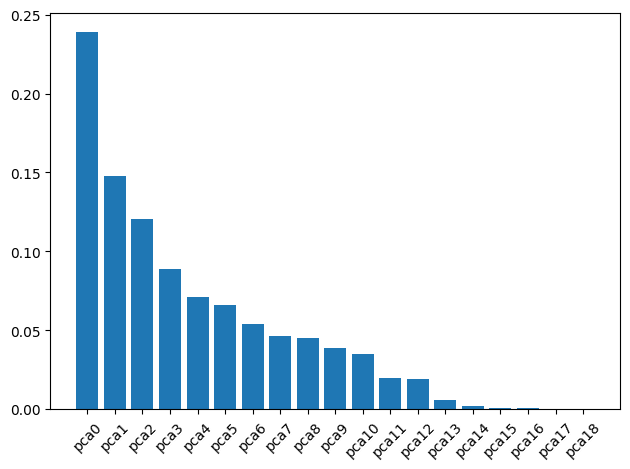

In [17]:
# NOTE: Show this plot in methodology
# Fix labels for feature and make graph pretty
# Visualize PCA
import matplotlib.pyplot as plt

plt.bar(pca.get_feature_names_out(), pca.explained_variance_ratio_)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



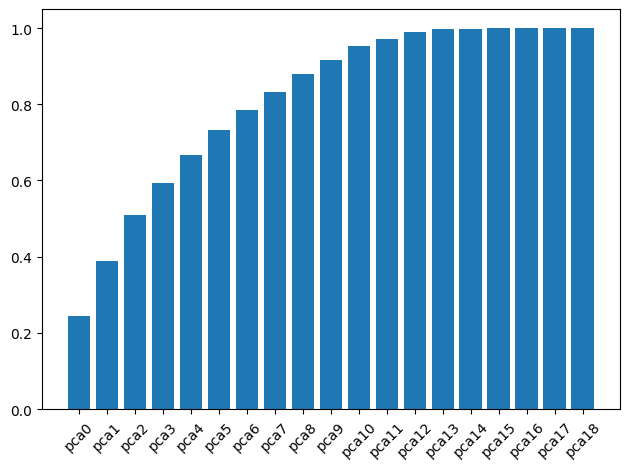

In [103]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.bar(labels, cumulative_variance)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [111]:
X_train_pca_reduced = pd.DataFrame(pca.transform(X_train)[:, :13])
X_test_pca_reduced = pd.DataFrame(pca.transform(X_test)[:, :13])
X_eval_pca_reduced = pd.DataFrame(pca.transform(X_eval)[:, :13])